#### Annotation Tool Script ####
* Annotation Script for Images Object Classification 

In [1]:
import numpy as np
import cv2
import glob
import sys
import os

In [2]:
import tkinter as tk
import tkinter.simpledialog

In [3]:
import sys
sys.path.append('C:/Users/Mafeus/Desktop/Git_Repos/OpenCV')
import OpCV_Utils

In [4]:
data_folder_path = 'images_data/'
images = glob.glob(data_folder_path + '*.png')

data_file = open('data.txt', 'a+')
data_info = open('data_info.txt', 'a+')

#### Image Annotation Loop

In [23]:
main = tk.Tk()
main.withdraw()

bboxes = []
cnt = 0

for img_path in (images):
    
    img_name = img_path.split('\\')[-1].split(',')[0]
    img = cv2.imread(img_path)
    img = cv2.resize(img, (360,300))
    
    copy = img.copy()
    cv2.putText(copy, 'Is this image valid? Y/N/D(delete)', (20, img.shape[0]-20),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 150, 0), 2)
    cv2.imshow("Select Object", copy) 
    cv2.waitKey(1)
    
    key = cv2.waitKey(0) or 0xff
    
    if key == ord('y'):
        
        bboxes.append([img_name])
        
        cv2.putText(img, 'Define Object Bounding Box', (20, img.shape[0]-20),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 150, 0), 2)
        
        n_objects = int(tkinter.simpledialog.askstring('Objs', 'Define Number of Objects you want to classify in this image: '))
        
        for j in range(n_objects):
            
            roi = cv2.selectROI("Select Object", img)
            p_start = (roi[0], roi[1])
            p_end = (roi[0]+roi[2], roi[1]+roi[3])

            class_name = tkinter.simpledialog.askstring('Define Class', 'Define Class: ')

            bboxes[cnt].append([p_start, p_end, class_name])
            
        data_file.write((str(bboxes[cnt]) + "\r"))
        
        cnt += 1

    if key == ord('n'):
        continue
        
    if key == ord('d'):
        os.remove(img_path)
        print(img_name  + " deleted!")
    
cv2.destroyAllWindows()
data_file.close()

for i in bboxes:
    print(i)

['img1.png', [(111, 11), (195, 80), 'crow beak'], [(192, 26), (218, 52), 'crow eye']]
['img3.png', [(234, 18), (252, 37), 'crow beak'], [(253, 19), (262, 27), 'crow eye']]
['img4.png', [(196, 30), (216, 49), 'crow eye'], [(216, 30), (277, 74), 'crow beak']]


#### Save Classes Info to data_info.txt

In [29]:
class_names = []

for bbox in bboxes:
    for j in range(1,len(bbox)):
        name = bbox[j][2]
        
        if name not in class_names:
            class_names.append(name)

data_info.write('Number of Classes: ' + str(len(class_names)) + "\r")
data_info.write('Classes:' + str(class_names) + "\r")
data_info.close()

print('Number of Classes:', len(class_names))            
print('Classes: ', class_names)

Number of Classes: 2
Classes:  ['crow beak', 'crow eye']


#### Checking Bounding Boxes

['img1.png', [(111, 11), (195, 80), 'crow beak'], [(192, 26), (218, 52), 'crow eye']]
['img3.png', [(234, 18), (252, 37), 'crow beak'], [(253, 19), (262, 27), 'crow eye']]
['img4.png', [(196, 30), (216, 49), 'crow eye'], [(216, 30), (277, 74), 'crow beak']]


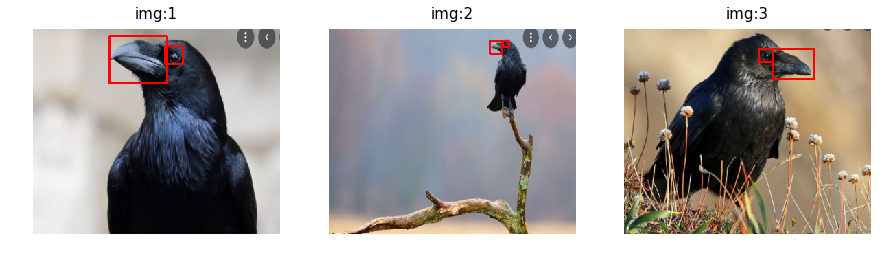

In [24]:
imgs = []
titles = []

for i, bbox in enumerate(bboxes):
    image = cv2.imread(data_folder_path + bboxes[i][0])
    image = cv2.resize(image, (360,300))
    
    bbox = bboxes[i]
    for j in range(1,len(bbox)):
        cv2.rectangle(image, bbox[j][0], bbox[j][1], (0,0,255), 2)
        
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    imgs.append(image)
    titles.append('img:{}'.format(i+1))
    print(bbox)
    
OpCV_Utils.show_multiple_imgs_plt([imgs], [titles], fig_size=(15,10))